# librosa
***

### 1. 載入套件

`pip3 install librosa`

In [1]:
import librosa
import numpy as np
from IPython.display import Audio  #播放套件
import matplotlib.pyplot as plt 
import librosa.display  #libroso 繪圖

### 2.匯入音檔 ＆ 播放

In [2]:
#使用內建音檔 librosa.example()查看其他音檔
# y, sr = librosa.load(librosa.ex('brahms'), duration=20) # duration = 秒數

#載入音檔，給檔案路徑
y, sr = librosa.load('./pop10-4-8.wav', sr=22050, duration=60) #sr:採樣率 (一般音樂 44100Hz/s ,官方建議用 22050分析資料 )

#試聽音檔
Audio(data=y, rate=sr)

### 3.繪製波形圖

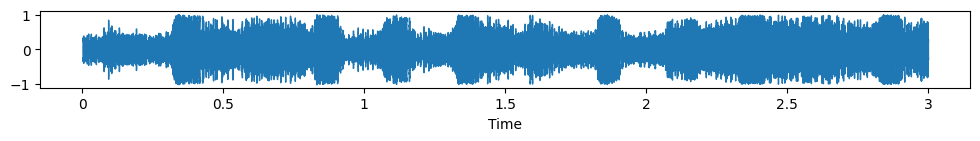

In [3]:
fig, ax = plt.subplots(sharex=True, figsize=(12,1))  # matplotlib 開圖面
librosa.display.waveshow(y, sr=sr)  # 波形繪製

### 4.頻譜圖  Ex: Short-time Fourier transform (STFT) 短時傅立葉轉換)

In [4]:
STFT = librosa.stft(y=y)

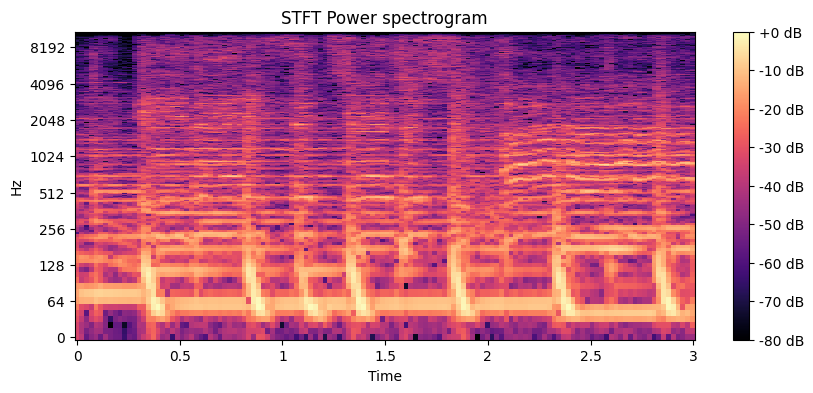

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
STFT_abs = np.abs(STFT)   # STFT 取絕對值

# librosa.display 繪製光譜圖，搭配 matplotlib 套件繪製。
img = librosa.display.specshow(librosa.amplitude_to_db(STFT_abs,ref=np.max), # ampltude_to_db() 振幅轉分貝
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('STFT Power spectrogram') # 標題
fig.colorbar(img, ax=ax, format="%+2.0f dB") # 分貝標示

---

# 特徵提取

## `Beat & tempo` 偵測節拍特徵 


* _`librosa.beat.beat_track`_ 
>1. beat: 節拍出現的 frame編號（時間點）
>2. temp: 節奏頻率 （次/分鐘）

In [6]:
# 偵測節拍，輸出兩個變數
# ----- y:音訊資料點, sr:採樣率, hop_length(不寫預設 512)-----
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, hop_length=512) 
print(tempo)
print(beat_frames) # array 

117.45383522727273
[ 15  37  59  80 102]


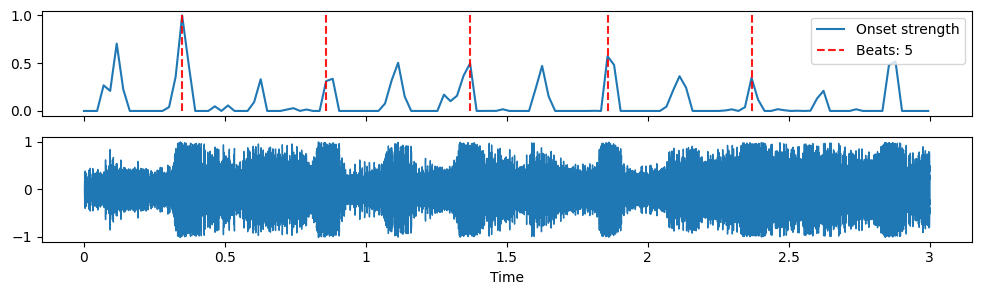

In [7]:
hop_length = 512 # 預設 512
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median) # 取光譜強度值
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length) # 取出時間資訊

# 開兩張圖對比
fig, ax = plt.subplots(nrows=2, sharex=True ,figsize=(12,3)) # 開兩張畫布
ax[0].plot(times, librosa.util.normalize(onset_env),label='Onset strength') # 將 onset_env value 正歸化成 0~1 範圍
ax[0].vlines(times[beat_frames], 0, 1, alpha=0.9, color='r',linestyle='--', label='Beats: '+str(len(beat_frames)))
librosa.display.waveshow(y, sr=sr,ax=ax[1]) # 第二張波形圖
ax[0].legend() # 加上標籤

---

## `Chroma 色度特徵`（表示每個八度音階的強度 C: "Do" , D: "Re" , E: "Mi"......）

1. _`librosa.feature.chroma_stft`_ 音階色譜

In [8]:
S = np.abs(librosa.stft(y)) # 先轉為 stft
chroma_stft = librosa.feature.chroma_stft(S=S, sr=sr) 

2. _`librosa.feature.chroma_cqt`_ Q常數音階色譜

In [9]:
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

3. _`librosa.feature.chroma_cens`_ 正規化音階色譜

In [10]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

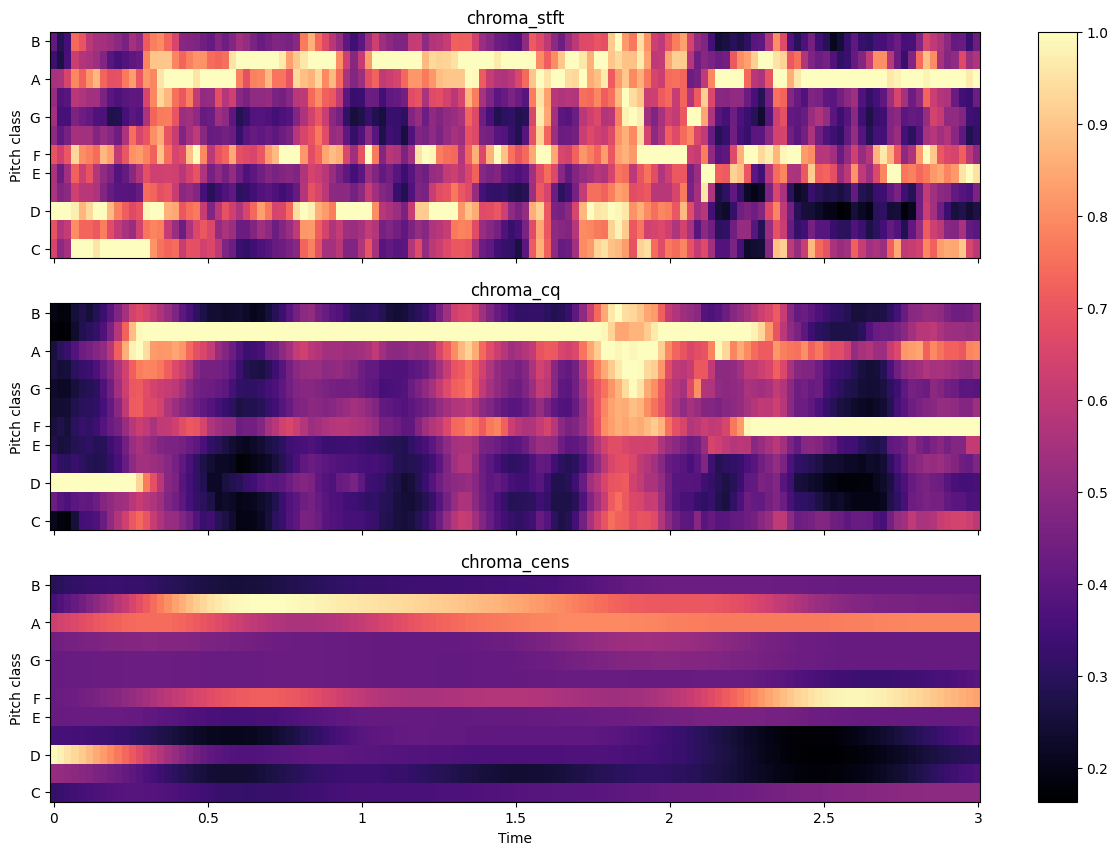

In [11]:
fig, ax = plt.subplots(nrows=3,ncols=1, sharex=True, sharey=True, figsize=(15, 10))
img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[2])
ax[0].label_outer()
ax[1].label_outer()
ax[0].set(title='chroma_stft')
ax[1].set(title='chroma_cq')
ax[2].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

---

## Ｍel-spectrogram 梅爾尺度光譜 ＆ MFCC 梅爾倒頻係數

* _`librosa.feature.melspectrogram`_
>音訊處理順序: load音檔的時間序列 -> stft(傅立葉轉換) -> mel-spectrogram

In [12]:
S = np.abs(librosa.stft(y))
melspectrogram = librosa.feature.melspectrogram(S=S, sr=sr)
melspectrogram.shape

(128, 130)

* _`librosa.feature.mfcc`_
>預設分離頻率 20個特徵

In [13]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20) # n_mfcc 數量
mfccs.shape # 20個有 130值的 numpy.arrary, 130值：音檔時間越長個數越多

(20, 130)

In [14]:
import pandas as pd
mfccs_df = pd.DataFrame(mfccs) # mfcc1~ mfcc20變數，在分別取 mean、var、std
mfccs_df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-128.115265,-108.489975,-93.975540,-31.265814,-9.202097,-34.437836,-59.152542,-73.840866,-86.370010,-112.631287,...,-25.846939,22.012793,63.046074,55.921753,23.574802,-8.606273,-24.902081,-28.202274,-21.056902,-29.481009
1,143.101456,130.489471,113.731247,100.129272,109.322403,121.253471,122.219238,124.902077,137.094971,155.162140,...,126.080414,129.180450,124.067307,121.360062,123.665329,130.865250,130.418762,124.849487,125.546730,136.623077
2,-0.810175,-3.842334,-7.238235,10.457294,19.328697,12.236242,4.559981,4.553709,3.257604,3.352933,...,-26.454391,-17.183893,-13.657506,-14.286053,-12.084480,-9.797956,-15.831635,-18.761482,-17.890329,-12.822214
3,20.481785,25.714664,26.346228,23.129333,21.157333,20.506395,16.136759,16.163776,14.955994,22.146338,...,1.725387,1.834127,7.686351,14.199467,14.256711,12.035799,7.669755,5.152291,-2.110080,-7.558894
4,5.844194,8.680025,4.809701,-14.610155,-17.868393,-7.086768,2.313921,9.315227,12.790775,7.605167,...,8.785526,3.905438,5.525296,10.387148,8.660826,7.423203,4.142932,4.118422,4.054589,2.606213
5,20.872612,17.334150,20.813366,27.562119,23.798008,12.143423,2.277442,-5.904052,-2.798269,4.609693,...,10.374489,14.531969,21.091812,25.538353,17.211040,12.597780,18.260265,14.998854,13.763978,9.505692
6,-1.809206,-1.759294,-1.172436,-11.016184,-8.046166,-1.564435,-3.448436,-0.424018,1.187730,-0.059112,...,13.863121,12.915737,8.909401,5.235213,2.878325,8.104439,10.894156,10.942853,12.332065,9.127263
7,7.212090,4.228920,2.890855,2.545714,5.319149,8.399179,6.495850,3.256244,1.168782,3.186478,...,9.816896,8.070835,11.078178,17.634733,17.845673,15.357592,13.517324,12.013739,12.578518,14.756832
8,-9.299973,-13.743492,-15.060673,-14.477137,-13.595741,-13.250719,-12.068834,-16.550882,-20.315727,-11.303163,...,2.057698,0.356060,-0.397759,4.752729,7.948852,9.356114,2.916108,-0.829858,2.578398,10.997343
9,11.713652,17.566542,18.301029,13.001606,9.513894,11.055943,9.014904,8.864182,8.542521,2.873943,...,16.754868,15.178610,12.542057,15.028601,18.294897,21.239227,14.714518,11.250881,11.708944,12.216824


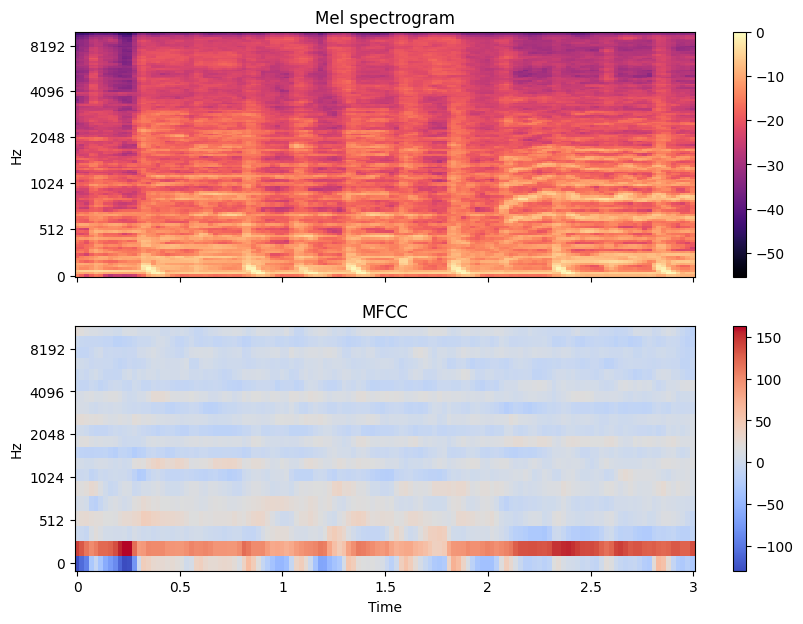

In [15]:
fig, ax = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10, 7))
img_mel = librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=10000, ax=ax[0])
img_mfcc= librosa.display.specshow(mfccs, x_axis='time',y_axis='mel', ax=ax[1])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].set(title='MFCC')
fig.colorbar(img_mel, ax=[ax[0]])
fig.colorbar(img_mfcc, ax=[ax[1]])

---

## RMS 均方根特徵

* _`librosa.feature.rms`_
>使用時間序列值_`y`_ 或頻譜值_`S`_, 的計算每幀的均方根。

In [16]:
rms = librosa.feature.rms(y=y)
rms.shape

(1, 130)

[Text(0.5, 1.0, 'STFT log Power spectrogram')]

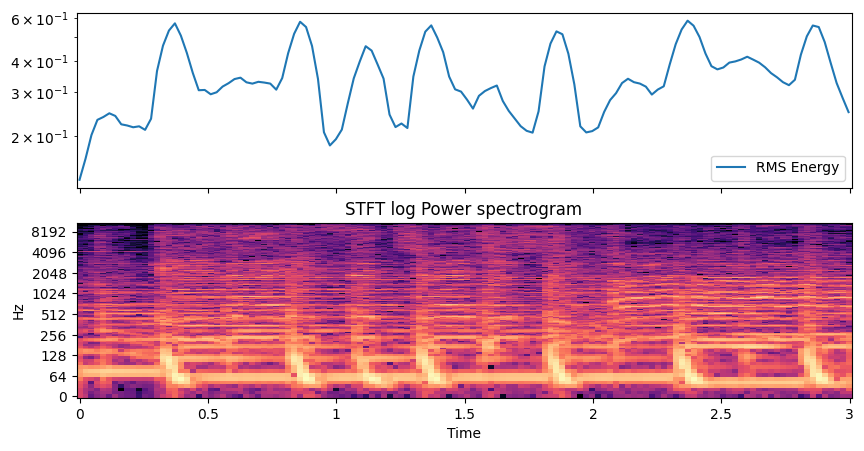

In [17]:
times = librosa.times_like(rms)  # 提取時間
S, phase = librosa.magphase(librosa.stft(y))  # 只取 S,  (D = S*P )

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,5))
ax[0].semilogy(times, rms[0], label='RMS Energy')   # rms => (1, 130), rms[0] => (130,)
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='STFT log Power spectrogram')

---

## spectral_centroid 光譜質心 （平均值）

* _`librosa.spectral_centroid`_
>每幀頻譜振幅的正規化和頻率區間上的分佈，從每一幀提取平均值。<br>
: 輸入時間序列、頻譜（stft -> magphase）

In [18]:
# 方法1. 使用時間序列計算
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent.shape

(1, 130)

In [19]:
# 方法2. 使用頻譜計算
D = librosa.stft(y)  # stft
S, phase = librosa.magphase(D)  # 只取 S,  (D = S*P )
cent1 = librosa.feature.spectral_centroid(S=S)
cent1.shape  #結果一樣

(1, 130)

[Text(0.5, 1.0, 'log Power spectrogram')]

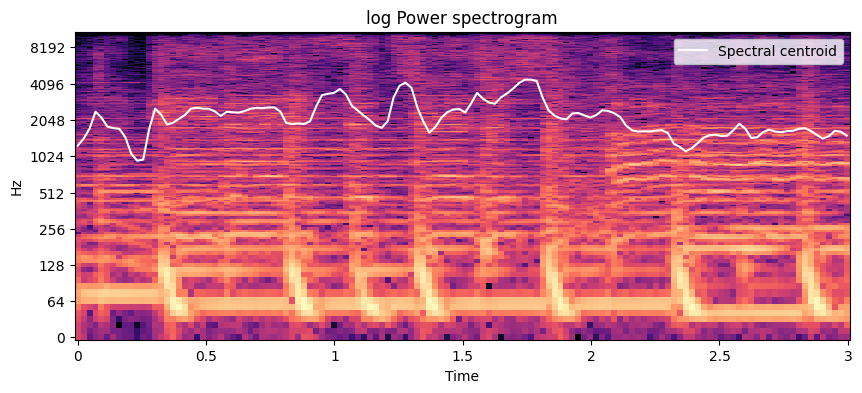

In [20]:
times = librosa.times_like(cent) # 提取時間
fig, ax = plt.subplots(figsize=(10,4)) # 開圖面設定大小
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent[0], label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

---

## spectral_bandwidth 光譜帶寬
>P階計算光譜帶寬<br>計算公式：_`(sum_k S[k, t] * (freq[k, t] - centroid[t])**p)**(1/p)`_

* _`spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)`_

In [21]:
# 1.時間序列輸入
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw.shape

(1, 130)

* _`S, phase = librosa.magphase(librosa.stft(y=y))`_

In [22]:
# 2.頻譜圖輸入
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_bandwidth(S=S).shape

(1, 130)

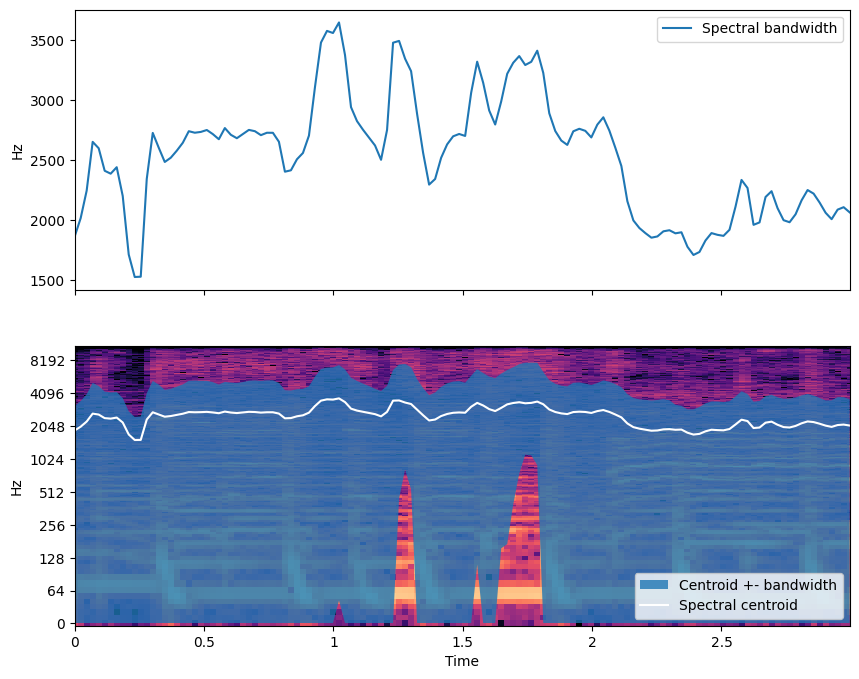

In [23]:
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,8))
# ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].plot(times, spec_bw[0],label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].fill_between(times,
                   np.maximum(0, centroid[0] - spec_bw[0]),
                   np.minimum(centroid[0] + spec_bw[0], sr/2),
                   alpha=0.8, label='Centroid +- bandwidth')
ax[1].plot(times, spec_bw[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

---

## spectral_contrast 光譜對比度

* _`contrast = librosa.feature.spectral_contrast(S=S, sr=sr)`_

In [24]:
# 輸入 stft取絕對值
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

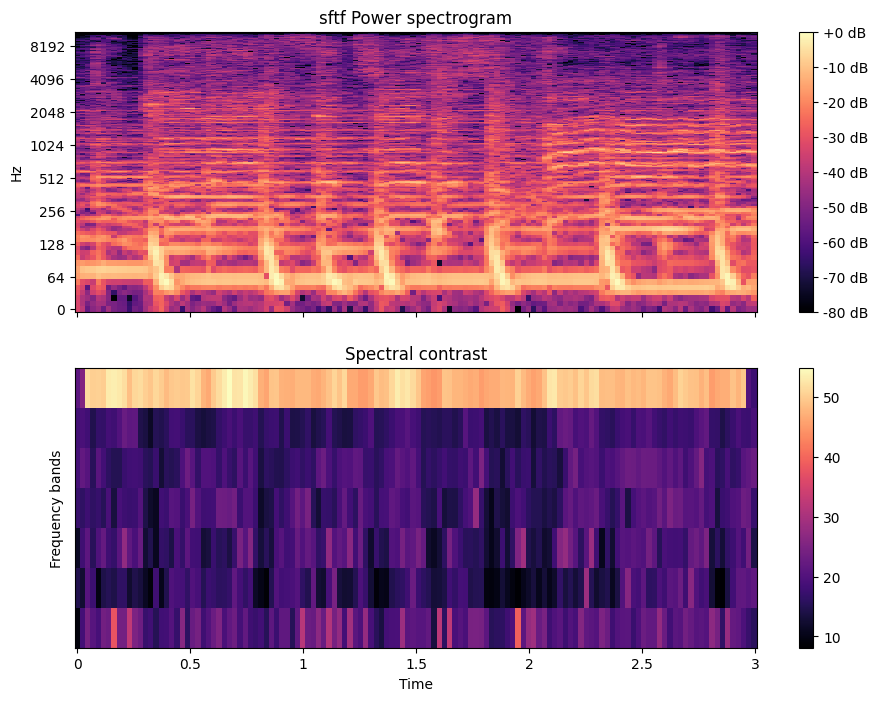

In [25]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(11,8))
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
                                y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='sftf Power spectrogram')
ax[0].label_outer()

img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

## tonnetz 三個調性強度

* _`librosa.feature.tonnetz`_
>將 **`chroma色度特徵`** 投影，純五度、小三度、大三度分別表示到二維資料。 <br>
  ----> _分析音訊什麼調性較強_

In [26]:
# y = librosa.effects.harmonic(y)  # 從時間序列中提取諧波元素
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

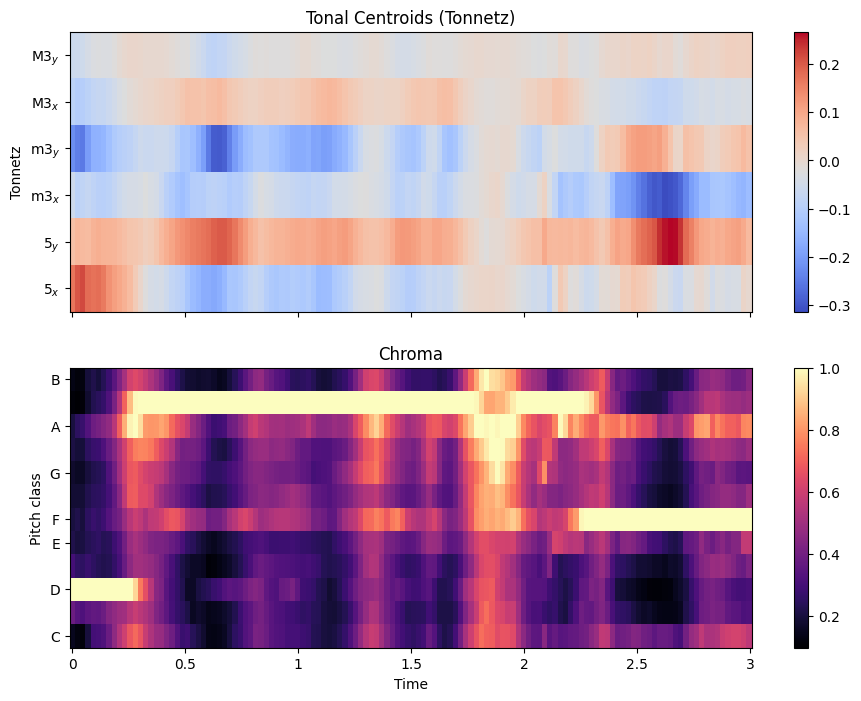

In [27]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(11,8))
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y, sr=sr),
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

---

## zero_crossing_rate 過零率

* _`librosa.feature.zero_crossing_rate`_
>每幀中，語音訊號從正變為負或從負變為正的次數。 這個特徵已在語音識別和音樂資訊檢索領域得到廣泛使用，通常對類似金屬、搖滾等高衝擊性的聲音的具有更高的價值。

In [28]:
zcr = librosa.feature.zero_crossing_rate(y=y)

In [29]:
zcr.shape

(1, 130)

---

## effects.harmonic 諧波特徵

* _`librosa.effects.harmonic`_
* 或是 _`librosa.effects.hpss`_ 取 harmonic特徵

In [30]:
y_harmonic = librosa.effects.harmonic(y)
# y_harmonic, y_percussive = librosa.effects.hpss(y) -> hpss 提取 harmonic 特徵一樣
y_harmonic.shape

(66150,)

In [31]:
# Use a margin > 1.0 for greater harmonic separation 使用更大的諧波分離
y_harmonic_m = librosa.effects.harmonic(y, margin=5.0)
y_harmonic_m.shape

(66150,)

In [32]:
# 原始音檔播放
Audio(data=y, rate=sr)

In [33]:
# 諧波處理後音檔播放
# Audio(data=y_harmonic, rate=sr)
Audio(data=y_harmonic_m, rate=sr) # 更大的諧波分離

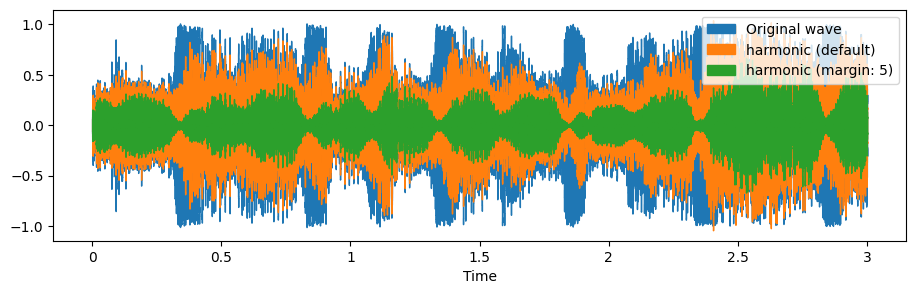

In [34]:
# 諧波變化波形
fig, ax = plt.subplots(figsize=(11,3))
librosa.display.waveshow(y, sr=sr, ax=ax, label='Original wave')
librosa.display.waveshow(y_harmonic, sr=sr, ax=ax ,alpha=1, label='harmonic (default)')
librosa.display.waveshow(y_harmonic_m, sr=sr, ax=ax, alpha=1, label='harmonic (margin: 5)')
ax.legend() # 加上標籤

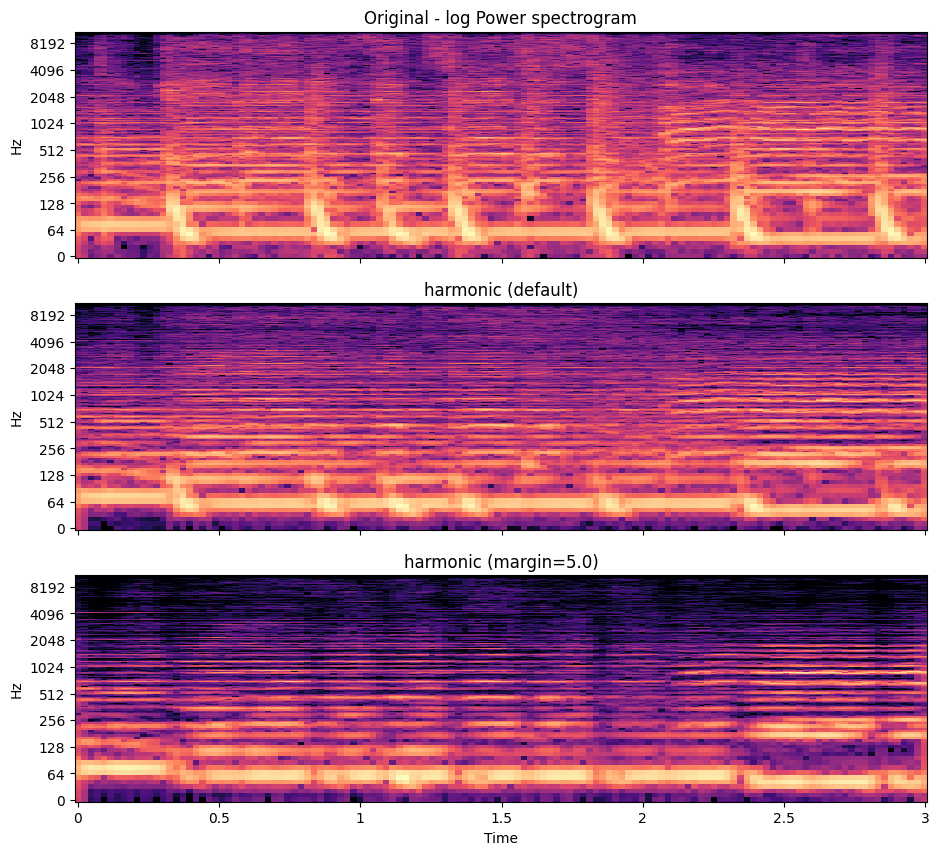

In [35]:
# 諧波頻譜變化
ys_harmonic = librosa.stft(y_harmonic)
ys_harmonic_m = librosa.stft(y_harmonic_m)
fig, ax = plt.subplots(nrows = 3, sharex=True, figsize=(11,10))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
librosa.display.specshow(librosa.amplitude_to_db(np.abs(ys_harmonic), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
librosa.display.specshow(librosa.amplitude_to_db(np.abs(ys_harmonic_m), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[0].set(title='Original - log Power spectrogram')
ax[1].set(title='harmonic (default)')
ax[2].set(title='harmonic (margin=5.0)')
ax[0].label_outer()
ax[1].label_outer()

---

## effects.percussive 打擊特徵 （鼓點）

* _`ibrosa.effects.percussive`_

In [36]:
y_percussive = librosa.effects.percussive(y)
# y_harmonic, y_percussive = librosa.effects.hpss(y) -> hpss 提取 percussive 特徵一樣
y_percussive.shape

(66150,)

In [37]:
y_percussive_m = librosa.effects.percussive(y, margin=3.0) #使用更大的效果
y_percussive.shape

(66150,)

In [38]:
# 原始音檔播放
Audio(data=y, rate=sr)

In [39]:
# 打擊特徵分離後音檔播放
# Audio(data=y_percussive, rate=sr)
Audio(data=y_percussive_m, rate=sr) #使用更大的效果

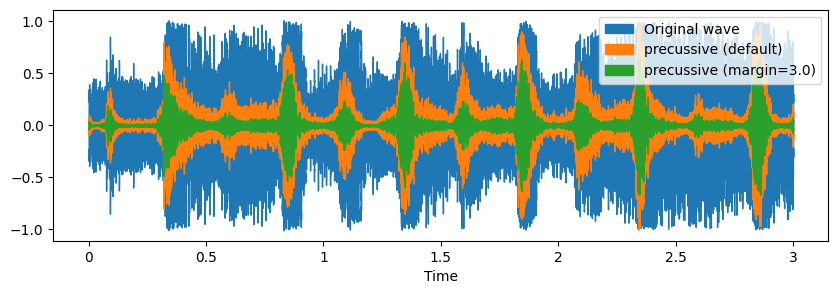

In [40]:
# 打擊特徵分離出的波形
fig, ax = plt.subplots(figsize=(10,3))
librosa.display.waveshow(y, sr=sr, ax=ax, label='Original wave')
librosa.display.waveshow(y_percussive, sr=sr, ax=ax, label='precussive (default)')
librosa.display.waveshow(y_percussive_m, sr=sr, ax=ax, label='precussive (margin=3.0)')
ax.legend()

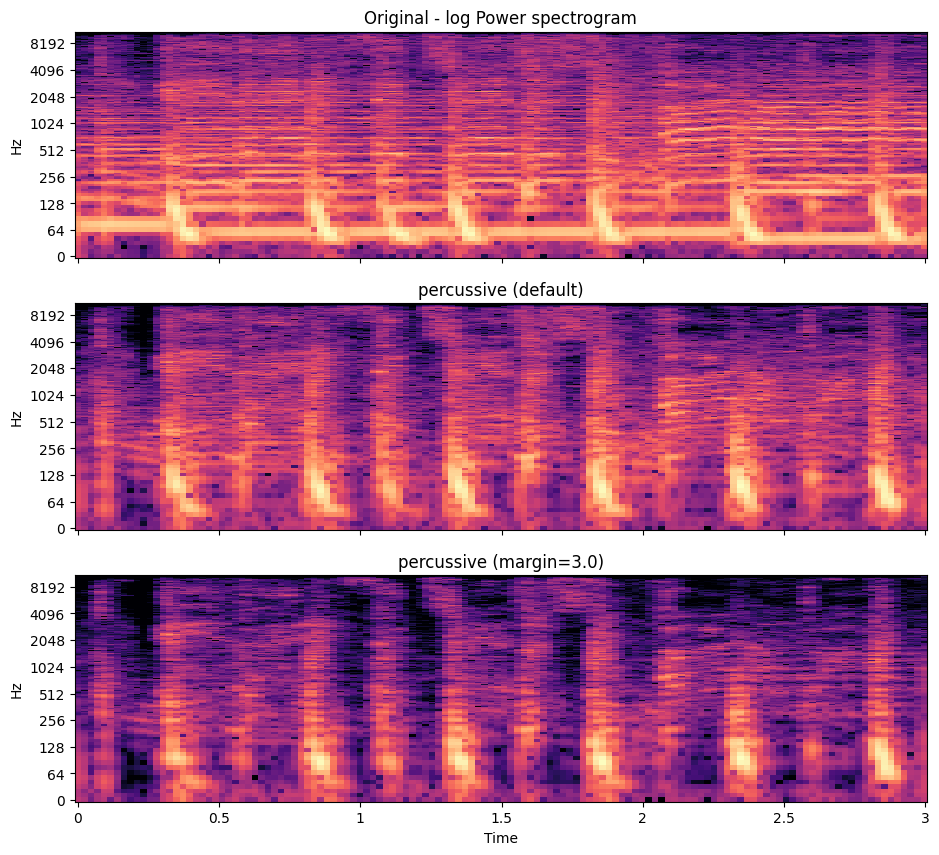

In [41]:
# 打擊特徵分離出的頻譜圖
ys_percussive = librosa.stft(y_percussive)
ys_percussive_m = librosa.stft(y_percussive_m)
fig, ax = plt.subplots(nrows = 3, figsize=(11,10))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
librosa.display.specshow(librosa.amplitude_to_db(np.abs(ys_percussive), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
librosa.display.specshow(librosa.amplitude_to_db(np.abs(ys_percussive_m), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[0].set(title='Original - log Power spectrogram')
ax[1].set(title='percussive (default)')
ax[2].set(title='percussive (margin=3.0)')
ax[0].label_outer()
ax[1].label_outer()

---

## spectral_rolloff 滾降頻率範圍

* _`ibrosa.spectral_rolloff`_
>roll_percet 範圍值 0 ~ 1 , default(0.85)

In [42]:
# 近似最大頻率滾降百分比 =0.85 (default)
rolloff_def = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff_def.shape

(1, 130)

In [43]:
# 近似最大頻率滾降百分比 =0.99
rolloff_max = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)

In [44]:
# 近似最小頻率滾降百分比 =0.01
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)

[Text(0.5, 1.0, 'log Power spectrogram')]

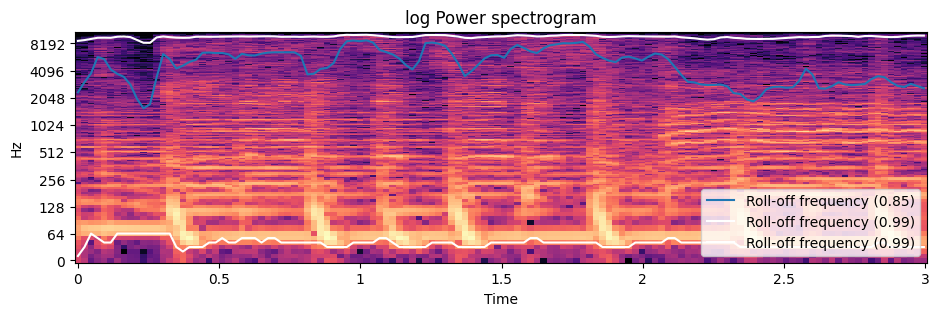

In [45]:
S, phase = librosa.magphase(librosa.stft(y)) # stft處理 -> 拆分振幅和相位
fig, ax = plt.subplots(figsize=(11,3))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff_def), rolloff_def[0], label='Roll-off frequency (0.85)')
ax.plot(librosa.times_like(rolloff_max), rolloff_max[0], label='Roll-off frequency (0.99)',color='w')
ax.plot(librosa.times_like(rolloff_min), rolloff_min[0], label='Roll-off frequency (0.99)',color='w')

ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

---

## poly_features 聚合特徵

* _`poly_features`_

In [46]:
S = np.abs(librosa.stft(y))
p0 = librosa.feature.poly_features(S=S)
p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(S=S, order=2)

In [47]:
print(p0.shape)
print(p1.shape)
print(p2.shape)

(2, 130)
(2, 130)
(3, 130)


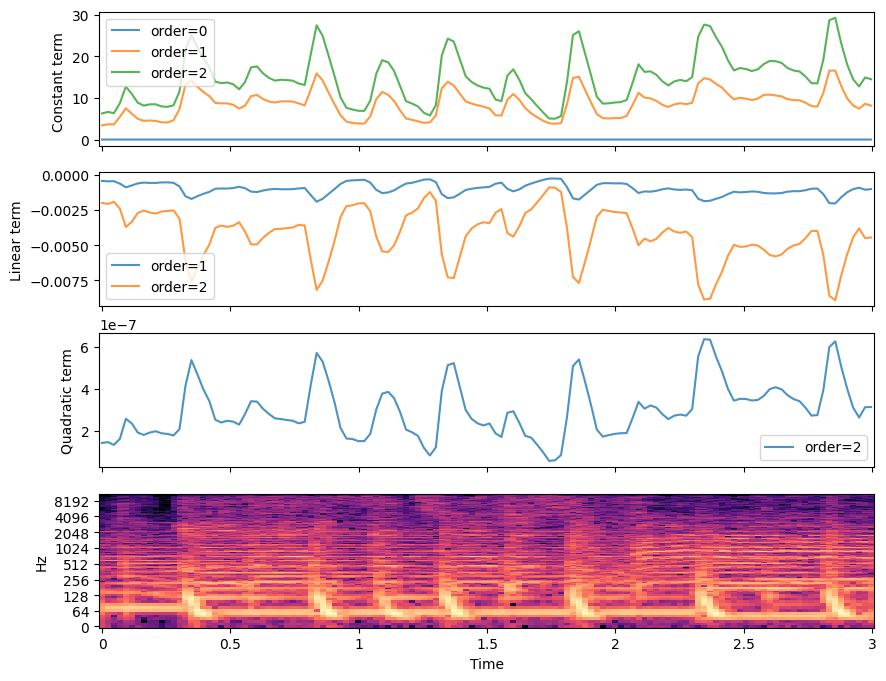

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(10, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])